![logo.png](https://github.com/interviewquery/takehomes/blob/stripe_1/stripe_1/logo.png?raw=1)



## Assignment

You are leading a project to analyze product performance at Stripe. We at Stripe are most interested in how the products are performing and growing as well as how to prioritize our product development efforts to maximize our growth. You have been provided an initial cut of data on a few flagship products, each of which is targeted at a specific user segment. From the data you've been given, please prepare a short presentation detailing your findings. 

**Product Usage Table:**

|Label| Description|
| - | :- |  
| `merchant` | This is the unique ID of each Stripe user |
|`date` | Data is aggregated up to the month level for each Stripe user.|
|`product` | This is the Stripe product that the user is using to charge their customers.|
|`event` | This is an action within a product. For more details on how products are used, see "segment details" below|
|`count of events` |       |
|`usd_amount` |Total amount in cents and USD that was processed for that API call|

**Segment Table:**

This is a mapping of merchant IDs to the user segmentation we have.

|Label| Description|
| - | :- | 
|`saas`| These businesses serve SaaS products which means they primarily charge their customers on a recurring basis (usually   monthly). We want them to use our Subscriptions payments product to charge regularly on a time interval.|
|`ecommerce` | These businesses use Stripe's shopping cart product and primarily sell physical or digital goods online. |
|`platforms` | These users are platforms upon which other users can sign up and charge for services through the Stripe API. Examples would include ridesharing services, delivery services, etc. (e.g. Lyft, Task Rabbit, Instacart) |


## Segment Details

### SaaS

SaaS users have two options when they process recurring payments. The recurring payments product allows them to schedule automatically recurring payments on a fixed schedule, but the merchants can also manually create charges on Stripe for their recurring payments. Our hope with the recurring payments product is to make it easy for all users to automate their payments. The product was launched in May 2013. 

### E-Commerce Store

Our shopping cart product enables online e-commerce stores to sell goods. We track details on their website around the conversion funnel and actions that customers take. We can see when an item is viewed, added to the cart, when the checkout flow is initiated, and when it is completed with a payment submitted. 

### Platforms 

Our Marketplace product allows platforms to charge on behalf of other users and payout funds to each end automatically.



### Questions to guide thinking:

1. How are each of Stripe's products and segments performing and where are they headed?

2. Are there any issues with the products that we should address?

3. Given more time and access to more data, what would you want to dig deeper on?

4. How should we prioritize development for different products, given our limited resources?




In [32]:
!git clone --branch stripe_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/stripe_1
!if [[ $(ls *.zip) ]]; then unzip *.zip; fi
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1768, done.
remote: Counting objects: 100% (576/576), done.
remote: Compressing objects: 100% (455/455), done.
remote: Total 1768 (delta 169), reused 481 (delta 120), pack-reused 1192
Receiving objects: 100% (1768/1768), 297.30 MiB | 20.59 MiB/s, done.
Resolving deltas: 100% (619/619), done.
/content/takehomes/stripe_1/takehomes/stripe_1
ls: cannot access '*.zip': No such file or directory
logo.png  product_usage.csv  segmentation.csv  takehomefile.ipynb


In [143]:
# Write your code here
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [144]:
# load the data
product = pd.read_csv("/content/takehomes/stripe_1/product_usage.csv")
segment = pd.read_csv("/content/takehomes/stripe_1/segmentation.csv")

In [171]:
segment.head()

,Merchant,Segment
0,282t1vpldi,SaaS
1,2x5fpa2a9k9,SaaS
2,39rrckrzfr,SaaS
3,3r5r60f6r,Platform
4,4p36czyqfr,Platform


In [146]:
product.columns

Index(['Merchant', 'Date', 'Product', 'Event', 'Count of events', 'Usd Amount',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [147]:
product = product[['Merchant','Date','Product', 'Event', 'Count of events', 'Usd Amount']].copy()

In [148]:
product.dropna(axis=0,how = 'all',inplace = True)

In [150]:
product.groupby('Product')['Usd Amount'].apply(lambda x:x.isnull().sum())

Product
Basic API         0
Cart            654
Marketplaces      0
Recurring         0
Name: Usd Amount, dtype: int64

In [160]:
product.dropna(axis=0, inplace=True)

In [161]:
product['Product'].value_counts()


Cart            218
Marketplaces    202
Recurring       100
Basic API        78
Name: Product, dtype: int64

In [162]:
clean_product = product.copy()

In [166]:
clean_product.duplicated().sum()

0

In [167]:
clean_product.head()

,Merchant,Date,Product,Event,Count of events,Usd Amount
0,282t1vpldi,01/01/2013,Basic API,Charge,33.00000,329967.00000
1,282t1vpldi,01/02/2013,Basic API,Charge,17.00000,169983.00000
2,282t1vpldi,01/03/2013,Basic API,Charge,20.00000,199980.00000
3,282t1vpldi,01/04/2013,Basic API,Charge,21.00000,209979.00000
4,282t1vpldi,01/05/2013,Recurring,Subscription.Charge,23.00000,229977.00000


<Axes: >

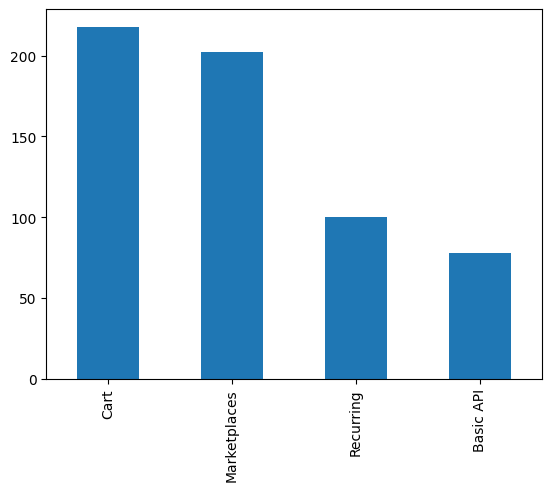

In [170]:
clean_product['Product'].value_counts().plot(kind = 'bar')

In [172]:
results = pd.merge(clean_product,segment,how = 'left',on='Merchant')

In [173]:
results.head()

,Merchant,Date,Product,Event,Count of events,Usd Amount,Segment
0,282t1vpldi,01/01/2013,Basic API,Charge,33.00000,329967.00000,SaaS
1,282t1vpldi,01/02/2013,Basic API,Charge,17.00000,169983.00000,SaaS
2,282t1vpldi,01/03/2013,Basic API,Charge,20.00000,199980.00000,SaaS
3,282t1vpldi,01/04/2013,Basic API,Charge,21.00000,209979.00000,SaaS
4,282t1vpldi,01/05/2013,Recurring,Subscription.Charge,23.00000,229977.00000,SaaS


In [180]:
segment.groupby('Segment').value_counts()

Segment           Merchant   
E-Commerce Store  8kkxv1xxbt9    1
                  9vd51p2e29     1
                  zz8yi2lz0k9    1
                  yadjx8estt9    1
                  wzimmlvj9k9    1
                  wtnlnqrrudi    1
                  w1x4pumobt9    1
                  tgiaz41jor     1
                  rczsldz33di    1
                  nsoxg9fi529    1
                  fix7e4xtj4i    1
                  c5dxqolxr      1
                  a9jszcl3di     1
Platform          hu22wwpcik9    1
                  u9nzlgqr529    1
                  r1aca4z33di    1
                  q5o0270t3xr    1
                  obpa1e89f6r    1
                  hkw5486w29     1
                  50zxrqc9pb9    1
                  4p36czyqfr     1
                  3r5r60f6r      1
SaaS              lv6bu51att9    1
                  jstcqq9qkt9    1
                  jrb04vuc8fr    1
                  gtey5htzkt9    1
                  ctow2fenrk9    1
                  awzc15r